<a href="https://colab.research.google.com/github/SundharessB/machine-learing/blob/main/2348564_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os # manipulate paths
from datetime import date # supplies classes for manipulating dates
from time import strftime # convert time to a string as specified by the format argument

from sklearn.preprocessing import LabelEncoder # encode target labels with value between 0 and n_classes-1.
from sklearn.linear_model import LogisticRegression # logistic regression classifier
from sklearn import ensemble # provides methods for both classification and regression
from sklearn.ensemble import RandomForestClassifier # random forest classifier


from sklearn.metrics import confusion_matrix # compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import roc_curve # compute receiver operating characteristic (ROC)
from sklearn.metrics import roc_auc_score # compute area under the receiver operating characteristic curve (ROC AUC) from prediction scores


from sklearn.model_selection import train_test_split # this splits data into training and test set

import matplotlib.pyplot as plt # to create visualisations
%matplotlib inline
import seaborn as sns

import warnings # remove warning messages
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
print("df shape:",df.shape)

df shape: (7043, 21)


4. Data Cleansing
There are 11 samples that have TotalCharges set to " ", which explain the reason why it is set as object. We investigate why these rows have no values and convert the type to numeric (float).


In [11]:
# find the rows in the dataset where there are no input for TotalCharges
total_charges = df[df.TotalCharges == " "]
total_charges.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [12]:
# check that all customers with tenure 0 have TotalCharges set as " "
new_customers = df[df.tenure == 0]
total_charges == new_customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
753,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
936,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1082,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1340,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3331,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3826,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4380,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5218,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6670,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


5. Exploratory Data Analysis


In [13]:
# replace the empthy rows by zero
df.loc[df['TotalCharges'] == " ", 'TotalCharges'] = '0'

# convert TotalCharges to numerical values
df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [14]:
# check for duplicated rows
dups = df[df.duplicated() == True].count()

# check for duplicated customers
dups_id = df['customerID'][df['customerID'].duplicated() == True].count()

print('Duplicated rows: ', dups.sum())
print('Duplicated customer ids: ', dups_id)


Duplicated rows:  0
Duplicated customer ids:  0


In [15]:
# check the total percentage of no show
pd.DataFrame(df.groupby('Churn')['customerID'].count()).apply(lambda x : x / sum(x) * 100)

,customerID
Churn,
No,73.463013
Yes,26.536987


Senior Citizen

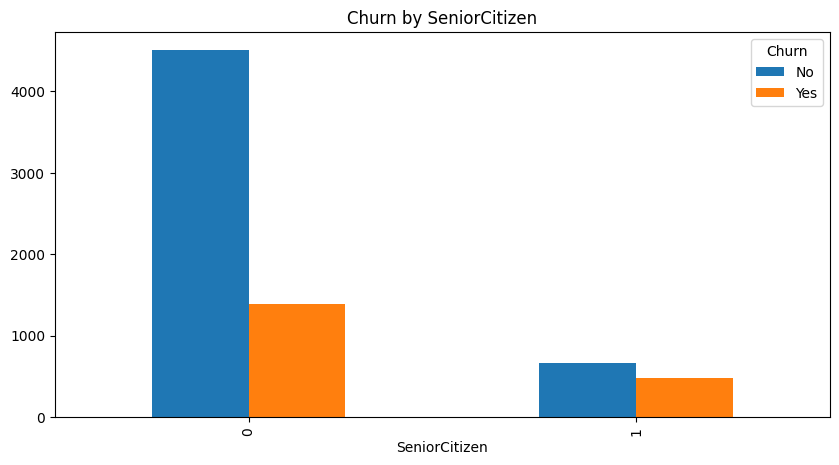

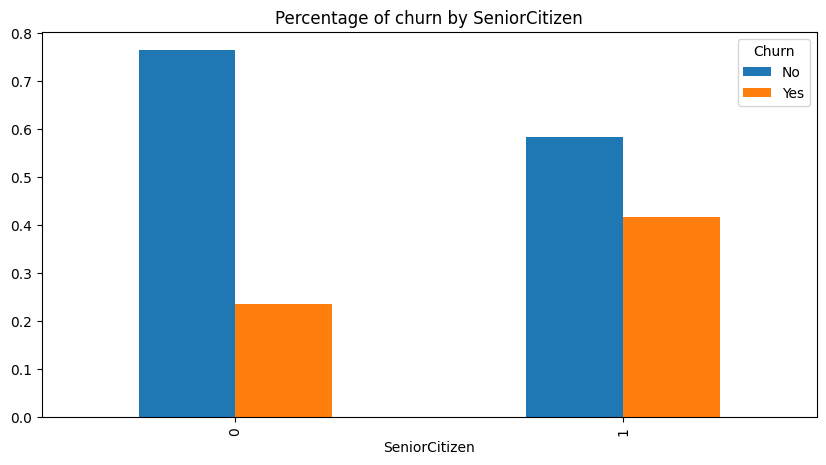

In [16]:
senior = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
senior.set_title("Churn by SeniorCitizen")
plt.show()
senior_pct = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
senior_pct.set_title("Percentage of churn by SeniorCitizen")
plt.show()


Dependents

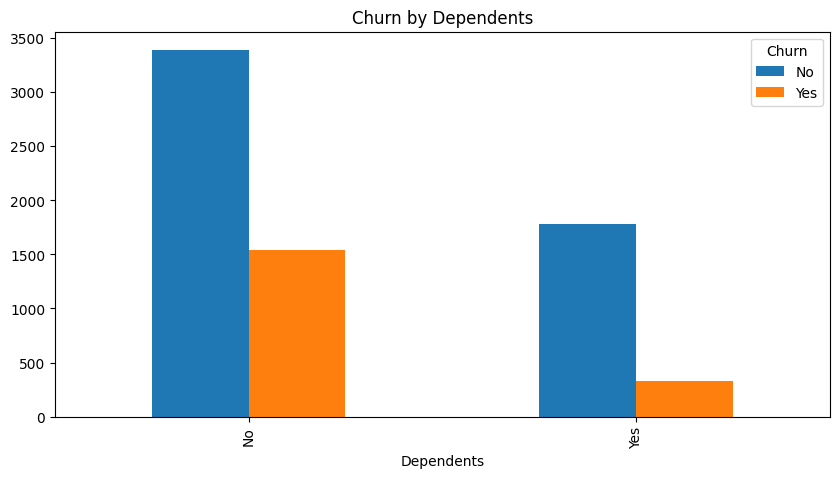

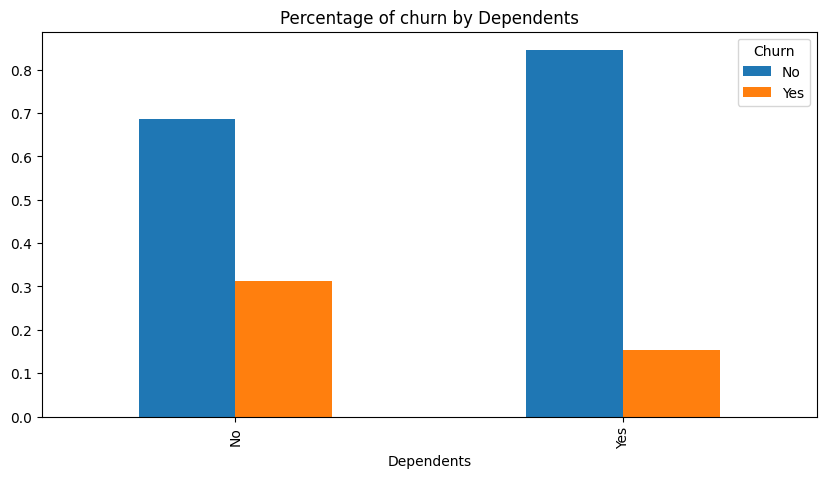

In [17]:
# churn by Partner
dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
dependents.set_title("Churn by Dependents")
plt.show()
dependents_pct = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
dependents_pct.set_title("Percentage of churn by Dependents")
plt.show()

30% of the customers in the dataset have dependants, 16% of these customers have churned. This represents almost half of the churn rate of the the customers that do not have dependants (31% churn).

Phone Service


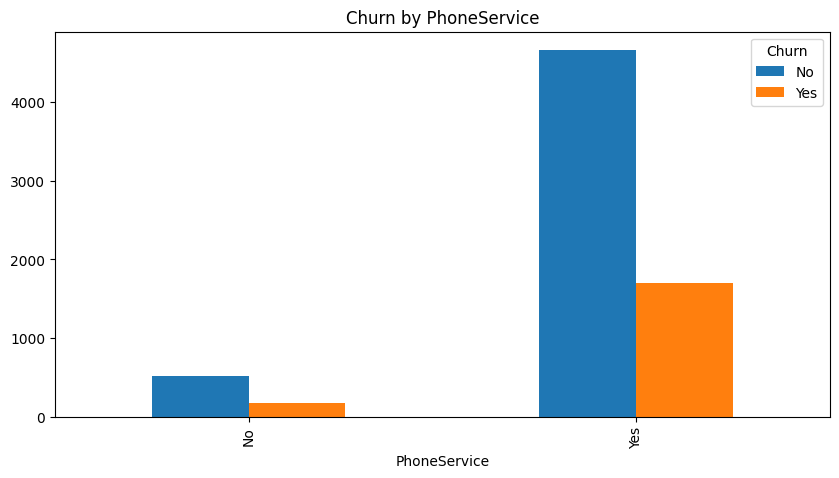

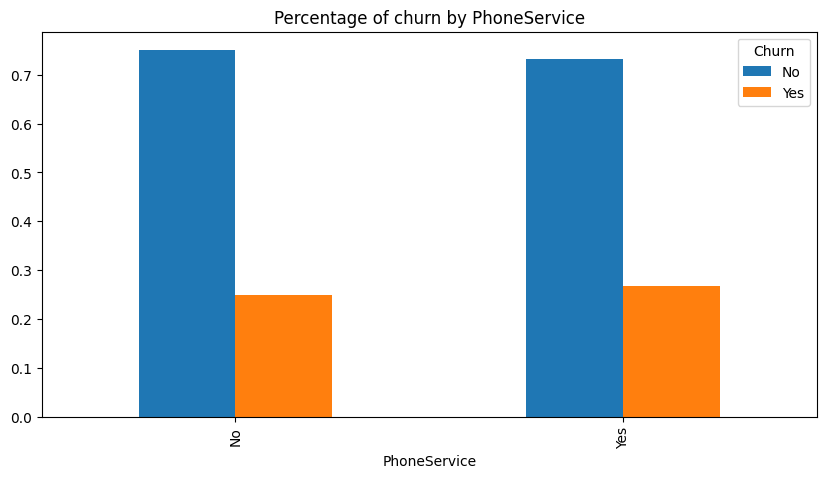

In [18]:
# churn by PhoneService
phservice = df.groupby('PhoneService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
phservice.set_title("Churn by PhoneService")
plt.show()
phservice_pct = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
phservice_pct.set_title("Percentage of churn by PhoneService")
plt.show()


The customers subscribed to the phone service represents 90% of the dataset, however when looking at the percentage churn there is no significant differences between the two sets.



Internet Service


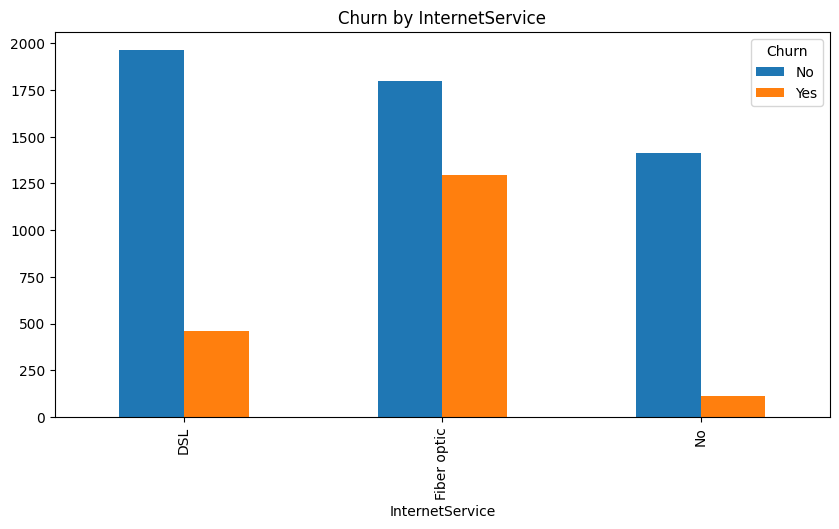

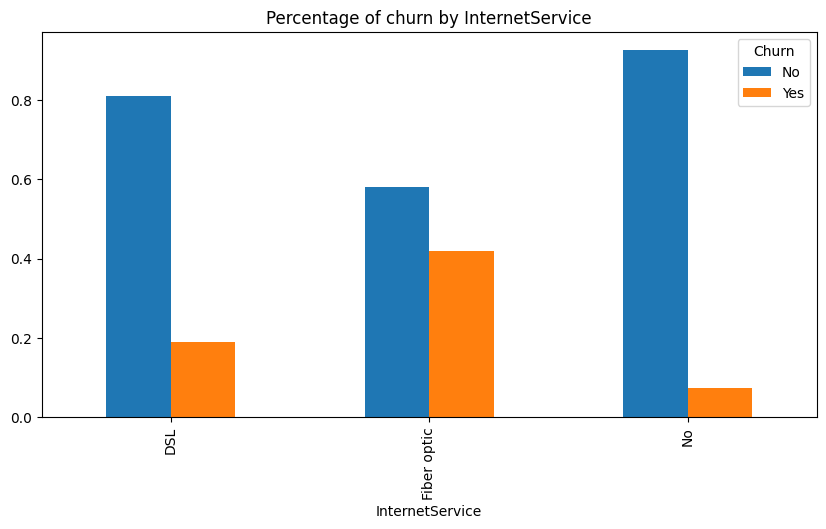

In [19]:
# churn by InternetService
internet = df.groupby('InternetService')['Churn'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
internet.set_title("Churn by InternetService")
plt.show()
internet_pct = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
internet_pct.set_title("Percentage of churn by InternetService")
plt.show()


There are noticeable differences in churn between the three differnt groups. Customers with the fiber optic have the biggest churn rate with 41%, Digital Subscriber Line (DSL) customers' churn rate is 19% and finally customers who do not have internet have a churn rate of 7%.



In [20]:
y = df.Churn


In [21]:
X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [22]:
le = LabelEncoder()

X['gender'] = le.fit_transform(X['gender'])
X['Partner'] = le.fit_transform(X['Partner'])
X['Dependents'] = le.fit_transform(X['Dependents'])
X['PhoneService'] = le.fit_transform(X['PhoneService'])
X['MultipleLines'] = le.fit_transform(X['MultipleLines'])
X['InternetService'] = le.fit_transform(X['InternetService'])
X['OnlineSecurity'] = le.fit_transform(X['OnlineSecurity'])
X['OnlineBackup'] = le.fit_transform(X['OnlineBackup'])
X['DeviceProtection'] = le.fit_transform(X['DeviceProtection'])
X['TechSupport'] = le.fit_transform(X['TechSupport'])
X['StreamingTV'] = le.fit_transform(X['StreamingTV'])
X['StreamingMovies'] = le.fit_transform(X['StreamingMovies'])
X['Contract'] = le.fit_transform(X['Contract'])
X['PaperlessBilling'] = le.fit_transform(X['PaperlessBilling'])
X['PaymentMethod'] = le.fit_transform(X['PaymentMethod'])
X['MonthlyCharges'] = le.fit_transform(X['MonthlyCharges'])
y = le.fit_transform(y)


In [23]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',0.0).astype(float)

In [24]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(5282, 19) (5282,)
(1761, 19) (1761,)


Logistic Regression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict no show
y_logreg_pred = logreg.predict(X_test)

# calculate the accuracy score
print('Accuracy of logistic regression classifier: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier: 0.80


In [26]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, matthews_corrcoef


y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_logreg_pred)
print("ROC AUC:", roc_auc)

# Calculate Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_logreg_pred)
print("Cohen's Kappa Score:", kappa_score)

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_logreg_pred)
print("Matthews Correlation Coefficient:", mcc)

ROC AUC: 0.7139881715162585
Cohen's Kappa Score: 0.4626691357505103
Matthews Correlation Coefficient: 0.47027393472152346


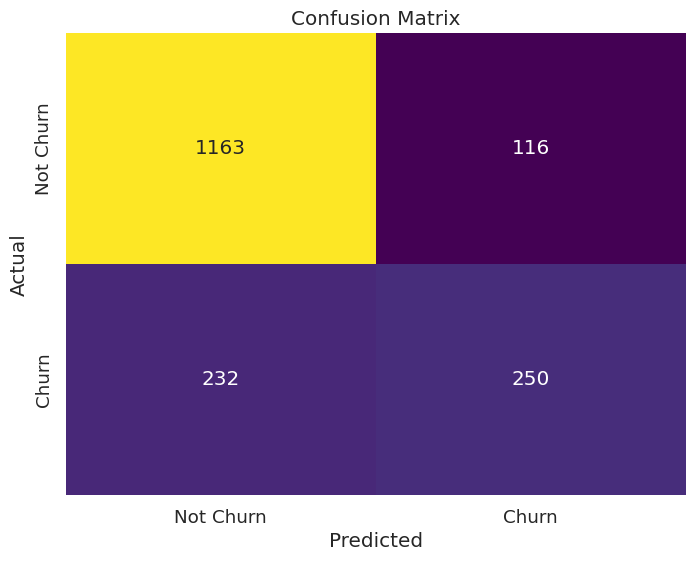

In [27]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_logreg_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

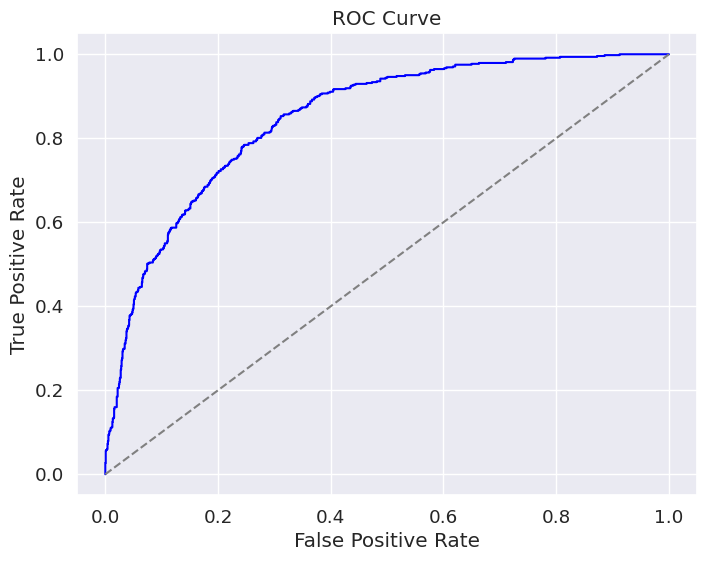

AUC: 0.8478769720898395


In [28]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class
y_logreg_pred = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_logreg_pred)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = roc_auc_score(y_test, y_logreg_pred)
print('AUC:', auc)

AUC-PR: 0.5


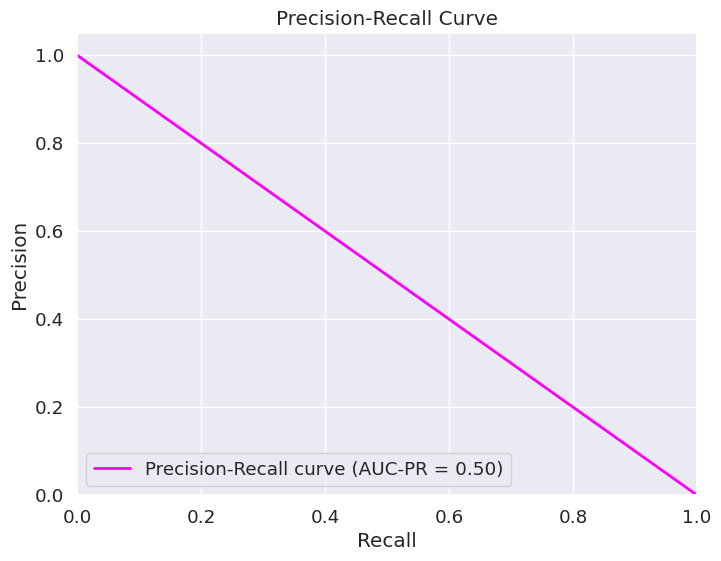

In [33]:
from sklearn.metrics import precision_recall_curve, auc

# Import label_binarize
from sklearn.preprocessing import label_binarize

# Convert y_test into binary labels
Y_test_binary = label_binarize(y_test, classes=['No', 'Yes'])

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test_binary, y_prob)

# Calculate AUC-PR
pr_auc = auc(recall, precision)
print("AUC-PR:", pr_auc)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='magenta', lw=2, label=f'Precision-Recall curve (AUC-PR = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

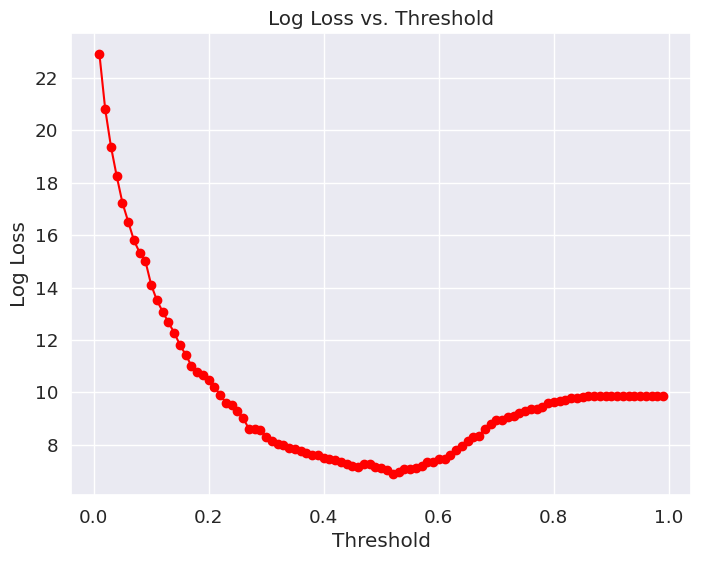

In [29]:
from sklearn.metrics import log_loss

log_loss_values = []

thresholds = np.arange(0.01, 1, 0.01)

for threshold in thresholds:
    # Apply a threshold to the predicted probabilities
    y_pred_threshold = (y_prob > threshold).astype(int)

    # Calculate log loss
    loss = log_loss(y_test, y_pred_threshold)

    # Append log loss to the list
    log_loss_values.append(loss)

# Plot log loss curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, log_loss_values, marker='o', linestyle='-', color='red')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Threshold')
plt.grid(True)
plt.show()

Text(-6, 0.2, 'Saturates at 0 and 1')

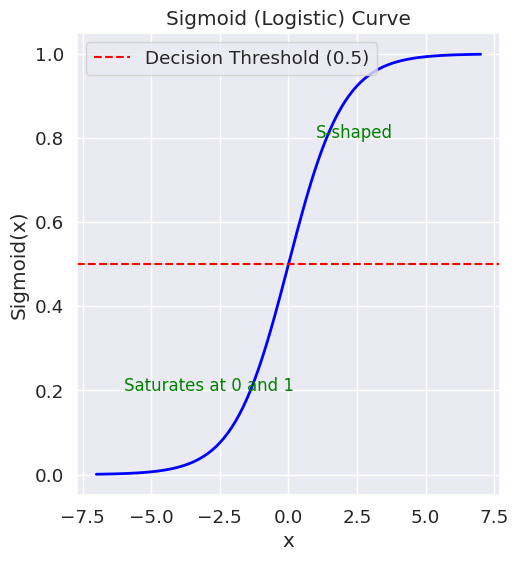

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-7, 7, 200)

# Calculate y values using the sigmoid function
y = sigmoid(x)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the sigmoid curve
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue', lw=2)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid (Logistic) Curve')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend(loc='upper left')

# Highlight the significance in the plot
plt.text(1, 0.8, 'S-shaped', fontsize=12, color='green')
plt.text(-6, 0.2, 'Saturates at 0 and 1', fontsize=12, color='green')

In [31]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import classification_report
from sklearn.metrics import classification_report

# Define hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Experiment with different C values
}

logreg = LogisticRegression()

# Perform hyperparameter tuning using grid search and cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_best = best_logreg.predict(X_test)
classification_report_best = classification_report(y_test, y_pred_best)
print("Classification Report (Best Model):")
print(classification_report_best)


Best Hyperparameters: {'C': 10}
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1279
           1       0.68      0.51      0.58       482

    accuracy                           0.80      1761
   macro avg       0.76      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761

